## Linear Models

`Linear models are a class of models that are widely used in practice and have been
studied extensively in the last few decades, with roots going back over a hundred
years. Linear models make a prediction using a linear function of the input features
and our goal is to fins the best straight lines that fits the data point
For regression, the general prediction formula for a linear model looks as follows:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w (model weights) and b (bias term) are parameters of the model that are learned, and ŷ is
the prediction the model makes.
`

<img src='../../../images/lr.png'>

 ## How linear regression algrithm works
 
<img src='../../../images/IMG_20200414_003459.jpg'>
 
<img src='../../../images/IMG_20200414_004430.jpg'>
 
<img src='../../../images/IMG_20200414_003933.jpg'>
 
<img src='../../../images/IMG_20200414_004140.jpg'>

## Gradient Descent

<img src='../../../images/g1.jpg'>

<img src='../../../images/g2.jpg'>

<img src='../../../images/g3.jpg'>

`gradient descent algorithm`

<img src='../../../images/gd.png'>

`for MSE loss function GD equation :`

<img src='../../../images/gdlr.png'>

`check this animation for GD to imagine how it works`

<img src='../../../images/sgd.gif'>

### Learning Rate efffect
`
we note that fitted line is not the best , for linear regression chaging training steps and learning rate may change the performance
`
<img src='../../../images/slr.png'>

<img src='../../../images/biglr.png'>

## linear regression in sklearn

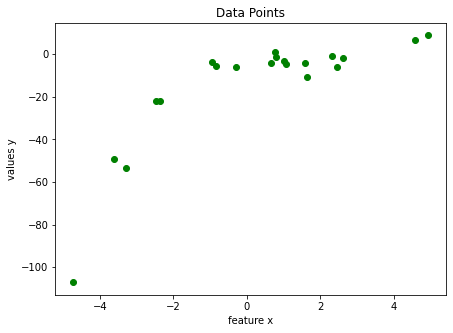

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.figure(figsize=(7,5))
plt.scatter(x,y,c='g')
plt.title('Data Points')
plt.xlabel('feature x')
plt.ylabel('values y')
plt.show()
x=x.reshape(-1,1)

In [11]:
# import linear regression module from sklearn
from sklearn.linear_model import SGDRegressor
model1=SGDRegressor(verbose=1) # new regressor object from SGDRegressor() class
model1.fit(x,y) # fit >>> start training to find best params

-- Epoch 1
Norm: 4.25, NNZs: 1, Bias: -1.633786, T: 20, Avg. loss: 376.605362
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.56, NNZs: 1, Bias: -2.858113, T: 40, Avg. loss: 277.304696
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.66, NNZs: 1, Bias: -3.820213, T: 60, Avg. loss: 239.028146
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.95, NNZs: 1, Bias: -4.696391, T: 80, Avg. loss: 220.895362
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.39, NNZs: 1, Bias: -5.435149, T: 100, Avg. loss: 207.286352
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.38, NNZs: 1, Bias: -6.110409, T: 120, Avg. loss: 197.589650
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.70, NNZs: 1, Bias: -6.715344, T: 140, Avg. loss: 189.545624
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.62, NNZs: 1, Bias: -7.278203, T: 160, Avg. loss: 182.913014
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 7.76, NNZs: 1, Bias: -7.782170, T: 180, Avg. loss: 178.051918
Total trainin

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [12]:
# show model coefs
print("theta_0",model1.intercept_)
print("theta_1",model1.coef_)

theta_0 [-16.47247541]
theta_1 [8.30878605]


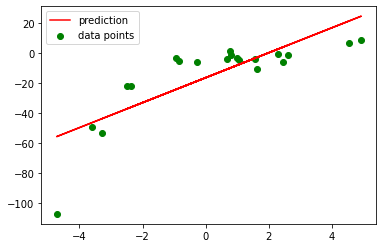

In [13]:
# plot model predictions vs actual values
y_pred=model1.predict(x)
plt.scatter(x,y,label='data points',color='g')
plt.plot(x,y_pred,color='r',label='prediction')
plt.legend() # show legend
plt.show()

In [14]:
# to evaluate linear regression model we may need to compute MSE error
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_true=y,y_pred=y_pred)
print("MSE error for this model (with one feature) ",error)

MSE error for this model (with one feature)  253.18201431128168


### feature engineering , how to develop good linear model

`in previous model , we note that it is suffering from an underfitting problem where straight line is not enough to learn from the data, to solve this we may need`
`to increase model complexity (increase model features)`

<img src='../../../images/lr_poly.png'>

In [17]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly2 = polynomial_features.fit_transform(x) # check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [18]:
# check new features
x_poly2

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

`feature scaling :`


`check x_poly2 array features magnitude vary heavily for example [-3.60267397, 12.97925974],[-4.7226796 , 22.30370258] `

`Well, most machine learning algorithms take into account only the magnitude of the measurements, not the units of those measurements.
That’s why one feature, which is expressed in a very high magnitude (number), may affect the prediction a lot more than an equally important feature.`

`Let’s say you have two lengths, l1 = 250 cm and l2 = 2.5 m `

`We humans see that these two are identical lenghts (l1 = l2), but most ML algorithms interpret this quite differently.
You see, the algo is going to give a lot more weight to l1, just because it is expressed in a larger number , which, in turn is going to have a much larger impact on the prediction than l2`

`so we need to sccale features before training`

In [23]:
from sklearn.preprocessing import MinMaxScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler2=MinMaxScaler()
x_poly2=scaler2.fit_transform(x_poly2)

In [24]:
x_poly2

array([[0.        , 0.14817138, 0.44376605],
       [0.        , 0.57198202, 0.02306218],
       [0.        , 0.39219643, 0.03284862],
       [0.        , 0.        , 0.91670607],
       [0.        , 0.1160085 , 0.53207924],
       [0.        , 1.        , 1.        ],
       [0.        , 0.40109887, 0.02651497],
       [0.        , 0.74335713, 0.24511637],
       [0.        , 0.72839883, 0.21673874],
       [0.        , 0.56873754, 0.02103653],
       [0.        , 0.65156562, 0.09809338],
       [0.        , 0.24443066, 0.22698537],
       [0.        , 0.45984363, 0.        ],
       [0.        , 0.65851632, 0.10695905],
       [0.        , 0.55840101, 0.01512279],
       [0.        , 0.59264061, 0.0378587 ],
       [0.        , 0.23206166, 0.25085143],
       [0.        , 0.76007502, 0.27886824],
       [0.        , 0.59904382, 0.04311118],
       [0.        , 0.96172294, 0.85527604]])

In [25]:
model2=SGDRegressor(verbose=1)
model2.fit(x_poly2,y)

-- Epoch 1
Norm: 1.25, NNZs: 2, Bias: -1.963109, T: 20, Avg. loss: 439.467754
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 2, Bias: -2.968898, T: 40, Avg. loss: 413.774653
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.31, NNZs: 2, Bias: -3.755092, T: 60, Avg. loss: 400.221885
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.72, NNZs: 2, Bias: -4.417487, T: 80, Avg. loss: 390.041934
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.10, NNZs: 2, Bias: -4.989091, T: 100, Avg. loss: 381.880291
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.44, NNZs: 2, Bias: -5.493665, T: 120, Avg. loss: 375.025304
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.76, NNZs: 2, Bias: -5.949100, T: 140, Avg. loss: 369.197312
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.06, NNZs: 2, Bias: -6.361974, T: 160, Avg. loss: 364.060155
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.35, NNZs: 2, Bias: -6.738385, T: 180, Avg. loss: 359.528941
Total trainin

Norm: 48.92, NNZs: 2, Bias: -25.707302, T: 8940, Avg. loss: 119.624090
Total training time: 0.20 seconds.
-- Epoch 448
Norm: 48.97, NNZs: 2, Bias: -25.728275, T: 8960, Avg. loss: 119.456837
Total training time: 0.20 seconds.
-- Epoch 449
Norm: 49.03, NNZs: 2, Bias: -25.749188, T: 8980, Avg. loss: 119.288646
Total training time: 0.20 seconds.
-- Epoch 450
Norm: 49.08, NNZs: 2, Bias: -25.770013, T: 9000, Avg. loss: 119.121835
Total training time: 0.20 seconds.
-- Epoch 451
Norm: 49.13, NNZs: 2, Bias: -25.790690, T: 9020, Avg. loss: 118.954678
Total training time: 0.20 seconds.
-- Epoch 452
Norm: 49.19, NNZs: 2, Bias: -25.811466, T: 9040, Avg. loss: 118.789407
Total training time: 0.20 seconds.
-- Epoch 453
Norm: 49.24, NNZs: 2, Bias: -25.832493, T: 9060, Avg. loss: 118.623897
Total training time: 0.21 seconds.
-- Epoch 454
Norm: 49.29, NNZs: 2, Bias: -25.853494, T: 9080, Avg. loss: 118.459414
Total training time: 0.21 seconds.
-- Epoch 455
Norm: 49.34, NNZs: 2, Bias: -25.873774, T: 9100,

Norm: 64.05, NNZs: 2, Bias: -32.019325, T: 16700, Avg. loss: 80.232080
Total training time: 0.40 seconds.
-- Epoch 836
Norm: 64.08, NNZs: 2, Bias: -32.031881, T: 16720, Avg. loss: 80.173157
Total training time: 0.40 seconds.
-- Epoch 837
Norm: 64.10, NNZs: 2, Bias: -32.044744, T: 16740, Avg. loss: 80.115159
Total training time: 0.40 seconds.
-- Epoch 838
Norm: 64.13, NNZs: 2, Bias: -32.057162, T: 16760, Avg. loss: 80.056421
Total training time: 0.40 seconds.
-- Epoch 839
Norm: 64.16, NNZs: 2, Bias: -32.070033, T: 16780, Avg. loss: 79.998897
Total training time: 0.41 seconds.
-- Epoch 840
Norm: 64.19, NNZs: 2, Bias: -32.082677, T: 16800, Avg. loss: 79.941026
Total training time: 0.41 seconds.
-- Epoch 841
Norm: 64.22, NNZs: 2, Bias: -32.095533, T: 16820, Avg. loss: 79.883461
Total training time: 0.41 seconds.
-- Epoch 842
Norm: 64.24, NNZs: 2, Bias: -32.107751, T: 16840, Avg. loss: 79.824724
Total training time: 0.41 seconds.
-- Epoch 843
Norm: 64.27, NNZs: 2, Bias: -32.120250, T: 16860

/home/mohamed-mossad/Projects/machine-learning-course/venv/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [26]:
# show model coefs
print("theta_0",model2.intercept_)
print("theta_1",model2.coef_)

theta_0 [-33.93112668]
theta_1 [  0.          57.71730916 -36.38430345]


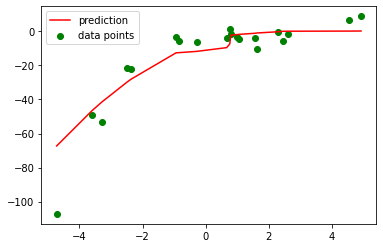

In [27]:
# plot model2 predictions vs actual values
y_pred2=model2.predict(x_poly2)
plt.scatter(x,y,label='data points',color='g')
plt.plot(sorted(x),sorted(y_pred2),color='r',label='prediction')
plt.legend() # show legend
plt.show()

In [28]:
error=mean_squared_error(y_true=y,y_pred=y_pred2)
print("MSE error for model with degree2",error)

MSE error for model with degree2 144.15875277107298
